# Proyek Analisis Data: Bike Sharing Dataset

---


- **Nama:** Clara Aulia Septiani

## Landasan Teori

### Pengertian Analisis Data dan Perannya dalam Pengambilan Keputusan

Analisis data merupakan proses mengolah dan memahami data untuk mendapatkan
informasi yang berguna. Dalam pengambilan keputusan berbasis data, analisis data
sangat penting karena membantu dalam memahami kondisi sebenarnya, menemukan
pola, serta mendukung pengambilan keputusan yang lebih tepat berdasarkan data,
bukan hanya berdasarkan perkiraan atau asumsi.

---

### Perbedaan Descriptive Analysis dan Exploratory Data Analysis (EDA)

Descriptive analysis digunakan untuk menggambarkan kondisi data secara umum,
misalnya melalui nilai rata-rata, median, dan distribusi data.
Sedangkan Exploratory Data Analysis (EDA) bertujuan untuk menggali data lebih dalam
untuk menemukan pola, tren, dan hubungan antar variabel yang dapat memberikan
insight baru dari data yang dianalisis.

---

### Pentingnya Data Cleaning dan Data Wrangling

Data cleaning dan data wrangling merupakan langkah awal yang sangat penting
sebelum melakukan analisis lanjutan. Proses ini dilakukan untuk menangani
missing value, data duplikat, serta ketidaksesuaian data agar data yang digunakan
lebih rapi, konsisten, dan siap untuk dianalisis dengan hasil yang lebih akurat.

---

### Peran Visualisasi Data dalam Menyampaikan Insight

Visualisasi data membantu menyampaikan hasil analisis secara lebih jelas dan
mudah dipahami. Dengan menggunakan grafik atau diagram, pola dan tren dalam data
dapat terlihat secara visual sehingga memudahkan pembaca dalam memahami
insight yang dihasilkan dari analisis.

---

### Penggunaan Machine Learning dalam Analisis

Pada proyek ini digunakan Machine Learning berupa regresi linear sederhana.
Model ini digunakan untuk melihat hubungan antara faktor cuaca dan jumlah
peminjaman sepeda. Penggunaan Machine Learning bertujuan sebagai pendukung
analisis agar insight yang diperoleh dari EDA menjadi lebih kuat, bukan sebagai
fokus utama dalam membangun model prediksi.


## Menentukan Pertanyaan Bisnis

- Apakah terdapat perbedaan pola penggunaan sepeda antara hari kerja biasa dan hari libur berdasarkan rata-rata jumlah peminjaman?
- Bagaimana pengaruh kondisi cuaca terhadap jumlah peminjaman sepeda, dan kondisi cuaca mana yang paling ideal bagi pengguna?

## Import Semua Packages/Library yang Digunakan

In [80]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score



sns.set(style="whitegrid")


## Data Wrangling

### Gathering Data

In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
df = pd.read_csv("/content/drive/MyDrive/ml/day.csv")
df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Dataset berhasil dimuat dan berisi data peminjaman sepeda harian
- Dataset mencakup informasi terkait waktu, kondisi cuaca, dan jumlah peminjaman sepeda yang akan dianalisis lebih lanjut.

### Assessing Data

In [66]:
# Melihat informasi umum dataset
df.info()
# Mengecek missing value
df.isnull().sum()
# Mengecek data duplikat
df.duplicated().sum()
# Statistik deskriptif
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Tidak ditemukan missing value pada dataset
- Tidak terdapat data duplikat
- Struktur data dan rentang nilai variabel masih dalam kondisi wajar untuk dianalisis

### Cleaning Data

In [67]:
# Membuat salinan data
df_clean = df.copy()

# Mengubah beberapa kolom menjadi tipe kategori
df_clean['season'] = df_clean['season'].astype('category')
df_clean['weathersit'] = df_clean['weathersit'].astype('category')
df_clean['workingday'] = df_clean['workingday'].astype('category')
df_clean['holiday'] = df_clean['holiday'].astype('category')

df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     731 non-null    int64   
 1   dteday      731 non-null    object  
 2   season      731 non-null    category
 3   yr          731 non-null    int64   
 4   mnth        731 non-null    int64   
 5   holiday     731 non-null    category
 6   weekday     731 non-null    int64   
 7   workingday  731 non-null    category
 8   weathersit  731 non-null    category
 9   temp        731 non-null    float64 
 10  atemp       731 non-null    float64 
 11  hum         731 non-null    float64 
 12  windspeed   731 non-null    float64 
 13  casual      731 non-null    int64   
 14  registered  731 non-null    int64   
 15  cnt         731 non-null    int64   
dtypes: category(4), float64(4), int64(7), object(1)
memory usage: 72.1+ KB


**Insight:**
- Tidak dilakukan penghapusan data karena dataset sudah bersih
- Penyesuaian tipe data dilakukan untuk mempermudah proses analisis dan visualisasi

## Transforming Data

In [68]:
# Membuat kategori jenis hari
df_clean['day_type'] = df_clean['weekday'].apply(
    lambda x: 'Weekend' if x in [0, 6] else 'Weekday'
)


weather_map = {
    1: 'Clear',
    2: 'Mist/Cloudy',
    3: 'Light Rain/Snow',
    4: 'Heavy Rain/Snow'
}

df_clean['weather_label'] = df_clean['weathersit'].map(weather_map)


# Menyiapkan fitur dan target untuk Machine Learning
features = df_clean[['temp', 'hum', 'windspeed']]
target = df_clean['cnt']


**Insight:**
- Variabel `day_type` memudahkan analisis perbedaan penggunaan sepeda antara hari kerja dan akhir pekan.
- Transformasi label musim membantu meningkatkan kejelasan hasil visualisasi.
- Pemilihan variabel cuaca sebagai fitur mendukung analisis lanjutan menggunakan regresi sederhana.


## Exploratory Data Analysis (EDA)

In [69]:
# Statistik deskriptif untuk variabel numerik utama
df_clean[['cnt', 'temp', 'hum', 'windspeed']].describe()


,cnt,temp,hum,windspeed
count,731.000000,731.000000,731.000000,731.000000
mean,4504.348837,0.495385,0.627894,0.190486
std,1937.211452,0.183051,0.142429,0.077498
min,22.000000,0.059130,0.000000,0.022392
25%,3152.000000,0.337083,0.520000,0.134950
50%,4548.000000,0.498333,0.626667,0.180975
75%,5956.000000,0.655417,0.730209,0.233214
max,8714.000000,0.861667,0.972500,0.507463


**Insight:**
- Rata-rata jumlah peminjaman sepeda harian cukup tinggi, menunjukkan layanan digunakan secara rutin.
- Variasi jumlah peminjaman cukup besar, yang mengindikasikan adanya faktor-faktor eksternal seperti cuaca dan hari kerja

In [70]:
#Pola Penggunaan Sepeda
df_clean.groupby('day_type')['cnt'].mean()


,cnt
day_type,
Weekday,4550.566219
Weekend,4389.685714


**Insight:**

Rata-rata peminjaman sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan,
menunjukkan sepeda lebih banyak digunakan untuk aktivitas harian.


In [71]:
# Hubungan Cuaca dan Peminjaman
df_clean[['temp', 'hum', 'windspeed', 'cnt']].corr()


,temp,hum,windspeed,cnt
temp,1.000000,0.126963,-0.157944,0.627494
hum,0.126963,1.000000,-0.248489,-0.100659
windspeed,-0.157944,-0.248489,1.000000,-0.234545
cnt,0.627494,-0.100659,-0.234545,1.000000


**Insight:**

Suhu memiliki hubungan positif terhadap jumlah peminjaman sepeda,
sementara kelembaban dan kecepatan angin menunjukkan hubungan negatif.


## Visualization & Explanatory Analysis

### Pertanyaan 1:

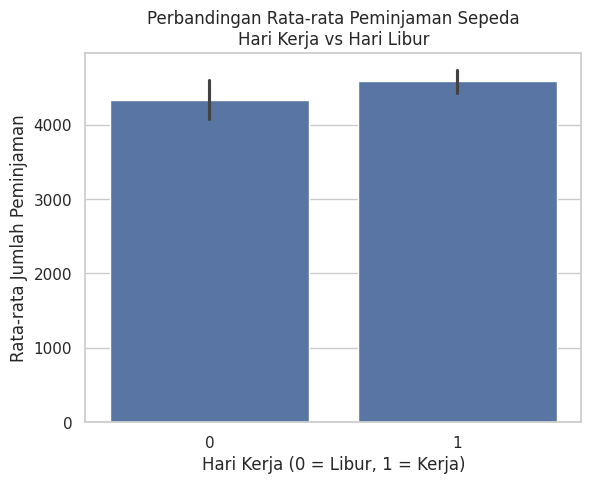

In [72]:
#Apakah terdapat perbedaan pola penggunaan sepeda antara hari kerja dan hari libur?
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(
    data=df_clean,
    x='workingday',
    y='cnt',
    estimator='mean'
)

plt.title("Perbandingan Rata-rata Peminjaman Sepeda\nHari Kerja vs Hari Libur")
plt.xlabel("Hari Kerja (0 = Libur, 1 = Kerja)")
plt.ylabel("Rata-rata Jumlah Peminjaman")
plt.show()


### Pertanyaan 2:

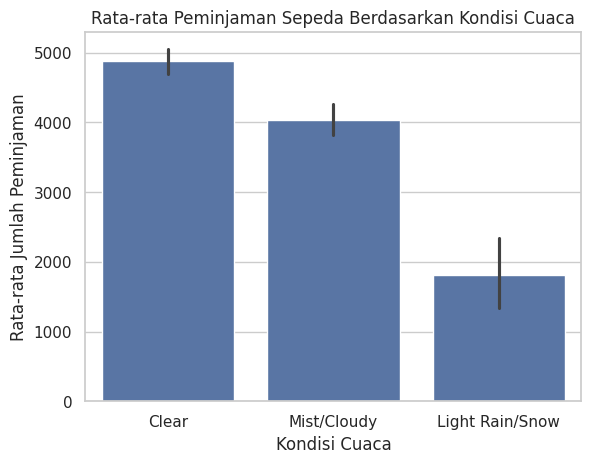

In [73]:
#Bagaimana pengaruh kondisi cuaca terhadap jumlah peminjaman sepeda?
sns.barplot(
    data=df_clean,
    x='weather_label',
    y='cnt',
    estimator='mean'
)

plt.title("Rata-rata Peminjaman Sepeda Berdasarkan Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Rata-rata Jumlah Peminjaman")
plt.show()


**Insight:**
- Rata-rata peminjaman sepeda pada hari kerja lebih tinggi dibandingkan hari libur, hal ini mengindikasikan bahwa sepeda lebih sering digunakan sebagai sarana transportasi harian dibandingkan untuk rekreasi.
- Kondisi cuaca cerah menunjukkan rata-rata peminjaman sepeda tertinggi.
Cuaca buruk secara signifikan menurunkan jumlah peminjaman sepeda.

### Analisis Lanjutan (Opsional)

### Tujuan Penggunaan Machine Learning

Model regresi linear digunakan untuk memahami hubungan antara variabel cuaca
(seperti suhu dan kelembaban) terhadap jumlah peminjaman sepeda.
Model ini tidak bertujuan untuk prediksi optimal, melainkan sebagai alat
pendukung untuk memperkuat insight dari hasil EDA.


#### 1. Menentukan Fitur dan Target

In [74]:
# Menentukan fitur (variabel independen) dan target
X = df_clean[['temp', 'hum', 'windspeed']]
y = df_clean['cnt']



- Fitur (X): faktor lingkungan yang memengaruhi kenyamanan pengguna
- Target (y): jumlah peminjaman sepeda yang ingin diprediksi

#### 2. Split Data (Train & Test)

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



- Data dibagi menjadi:

  80% data latih

  20% data uji

- Bertujuan untuk menguji performa model pada data yang belum pernah dilihat

#### 3. Training Model Regresi Linear


In [76]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()



Model mempelajari hubungan linear antara:

*   Suhu
*   Kelembapan

*   Kecepatan angin

terhadap jumlah peminjaman sepeda.

#### 4. Evaluasi Model

In [77]:
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, r2


(1196.956055531855, 0.49606445111931263)



- MAE (Mean Absolute Error): rata-rata selisih prediksi dengan nilai aktual

- R² Score: seberapa baik fitur menjelaskan variasi data




#### 5. Interpretasi Koefisien Model

In [78]:
coef_df = pd.DataFrame({
    'Fitur': X.columns,
    'Koefisien': model.coef_
})

coef_df


,Fitur,Koefisien
0,temp,6589.714925
1,hum,-2995.743977
2,windspeed,-4153.013878




- Koefisien positif: meningkatkan jumlah peminjaman

- Koefisien negatif: menurunkan jumlah peminjaman

**Insight:**

- Suhu memiliki pengaruh positif terhadap jumlah peminjaman sepeda.
- Kelembaban dan kecepatan angin cenderung menurunkan jumlah peminjaman.
- Hasil ini konsisten dengan temuan pada tahap EDA.


#### 6. Visualisasi Aktual vs Prediksi

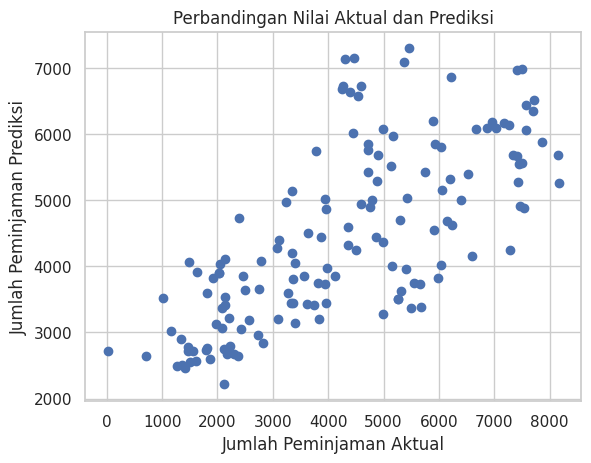

In [79]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Jumlah Peminjaman Aktual")
plt.ylabel("Jumlah Peminjaman Prediksi")
plt.title("Perbandingan Nilai Aktual dan Prediksi")
plt.show()


- Titik yang mendekati garis diagonal menunjukkan model mampu menangkap pola umum

- Penyimpangan menunjukkan adanya faktor lain yang belum dimasukkan

### Interpretasi Hasil ML
Hasil regresi menunjukkan bahwa suhu memiliki pengaruh positif terhadap jumlah
peminjaman sepeda, sementara kelembaban berpengaruh negatif.
Hal ini memperkuat hasil EDA bahwa kondisi cuaca berperan penting
dalam pola penggunaan sepeda.

## Conclusion

- Conclution pertanyaan 1

Berdasarkan hasil Exploratory Data Analysis dan visualisasi yang dilakukan, rata-rata jumlah peminjaman sepeda pada hari kerja lebih tinggi dibandingkan hari libur. Hal ini berarti  layanan sepeda lebih banyak dimanfaatkan sebagai sarana transportasi rutin dibandingkan sebagai aktivitas rekreasi. Hal ini menunjukkan bahwa pengelolaan jumlah sepeda sebaiknya lebih difokuskan pada hari kerja untuk memenuhi kebutuhan pengguna.
- Conclution pertanyaan 2

Hasil analisis menunjukkan bahwa kondisi cuaca memiliki pengaruh yang signifikan terhadap jumlah peminjaman sepeda. Cuaca cerah menghasilkan rata-rata peminjaman tertinggi, sementara kondisi cuaca buruk cenderung menurunkan minat penggunaan sepeda. Hal ini didukung oleh model regresi sederhana yang menunjukkan bahwa faktor suhu memiliki pengaruh positif terhadap jumlah peminjaman, sedangkan kelembaban dan kecepatan angin berpengaruh negatif. Maka dari itu, faktor lingkungan berperan penting dalam menentukan tingkat penggunaan sepeda.

## Kesimpulan Akhir

Secara keseluruhan, analisis data menunjukkan bahwa pola penggunaan sepeda dipengaruhi oleh jenis hari dan kondisi cuaca. Exploratory Data Analysis berhasil memberikan pemahaman awal terhadap pola data, sementara penerapan Machine Learning sederhana digunakan sebagai analisis tambahan untuk mendukung insight yang diperoleh. Hasil analisis ini dapat digunakan sebagai dasar pengambilan keputusan dalam perencanaan operasional dan pengelolaan layanan sepeda berbasis data.